In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
sns.set();

In [2]:
def plot(t, res):
    plt.figure(figsize=(16,10))

    plt.subplot(221)
    plt.plot(t, res[:,2])
    plt.xlim(t[0], t[-1])
    plt.title("X (m)")

    plt.subplot(222)
    plt.plot(t, res[:,3])
    plt.xlim(t[0], t[-1])
    plt.title("X' (m/s)")

    plt.subplot(223)
    plt.plot(t, res[:,4])
    plt.xlim(t[0], t[-1])
    plt.title("X'' (m/s2)")

    plt.subplot(224)
    plt.plot(t, res[:,0]/np.pi*180)
    plt.xlim(t[0], t[-1])
    plt.title("Theta (deg)")

    #plt.subplot(235)
    #plt.plot(t, res[:,1]/np.pi*180)
    #plt.xlim(t[0], t[-1])
    #plt.title("Theta' (deg/s)")

    plt.show()

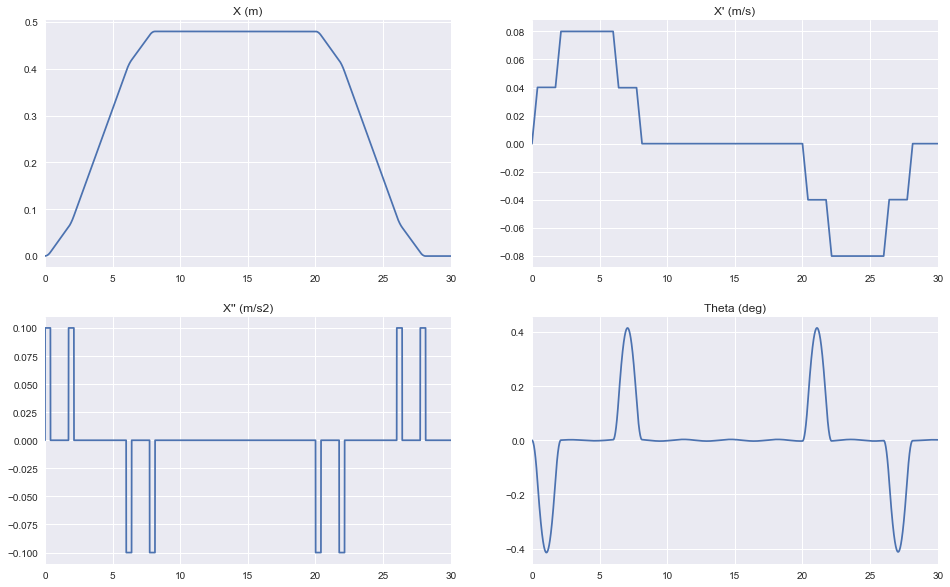

In [3]:
def ode(Y, t, params):
    L, g = params
    theta, theta_p, x, x_p, x_pp = Y
    return [theta_p, -(x_pp + g*theta)/L,
           x_p, x_pp, 0]

# Simulation config
step = 0.001
t_start = 0
t_stop = 30
t_stop = t_stop
step_count = round((t_stop-t_start)/step)
res = np.zeros((step_count+1, 5))

# Parameters setting
L = 3
g = 9.81

# Initial params
theta = 0
theta_p = 0
x = 0
x_p = 0
x_pp = 0

# Controller
seq = 0
direc = 0
spd = 0.08
spd_min = 0.0001
accel = 0.1

# Simulation
y0 = [theta, theta_p, x, x_p, x_pp]
p = [L, g]
res[0, :] = y0
for i in range(step_count):
    t = np.linspace(t_start+i*step, t_start+(i+1)*step, 2)
    res[i+1, :] = theta, theta_p, x, x_p, x_pp = odeint(ode, y0, t, args=(p,))[-1, :]
    
    # Controller
    if seq ==0:
        if i*step == 0:
            seq = 1
            direc = 0
        elif i*step == 6:
            seq = 5
        elif i*step == 20:
            seq = 1
            direc = 1
        elif i*step == 26:
            seq = 5
    elif seq == 1:
        seq = seq + 1
        x_pp = accel if direc==0 else -accel
    elif seq == 2 and abs(x_p) >= spd/2:
        seq = seq + 1
        x_pp = 0
        theta_target = abs(theta)
    elif seq == 3 and abs(theta) <= theta_target:
        seq = seq + 1
        x_pp = accel if direc==0 else -accel
    elif seq == 4 and abs(x_p) >= spd:
        seq = 0
        x_pp = 0
    elif seq == 5:
        seq = seq + 1
        x_pp = -accel if direc==0 else accel
    elif seq == 6 and abs(x_p) <= spd/2:
        seq = seq + 1
        x_pp = 0
        theta_target = abs(theta)
    elif seq == 7 and abs(theta) <= theta_target:
        seq = seq + 1
        x_pp = -accel if direc==0 else accel
    elif seq == 8 and abs(x_p) <= spd_min:
        seq = 0
        x_pp = 0
        x_p = 0
    
    # Update params for next iter
    y0 = theta, theta_p, x, x_p, x_pp
    
t = np.arange(t_start, t_stop+step, step)
plot(t, res)